# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units= "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [5]:
#build request and store in a variable.     
response=requests.get(query_url).json()
response


{'coord': {'lon': -159.319, 'lat': 22.0752},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 297.48,
  'feels_like': 297.87,
  'temp_min': 295.93,
  'temp_max': 299.15,
  'pressure': 1019,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 8.23, 'deg': 40},
 'rain': {'1h': 0.51},
 'clouds': {'all': 75},
 'dt': 1620960069,
 'sys': {'type': 1,
  'id': 7873,
  'country': 'US',
  'sunrise': 1620921516,
  'sunset': 1620968927},
 'timezone': -36000,
 'id': 5848280,
 'name': 'Kapaa',
 'cod': 200}

In [6]:
# lat=response['coord']['lat']
# lon=response['coord']['lon']


In [7]:
cities_clean=[]
lat=[]
lon=[]
temp=[]
humidity =[]
wind_speed=[]
date=[]
clouds=[]

for index, city in enumerate(cities):
    try:
        units= "metric"
        url = "http://api.openweathermap.org/data/2.5/weather?"

        query_url = url + "appid=" + weather_api_key + "&q=" + city
        response=requests.get(query_url).json()
        cities_clean.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['weather'][0]['description'])
        #date.append(response['weather'][0]['description'])
        
        #Include a print log of each city as it'sbeing processed (with the city number and city name).
        print(f'printing city number {index + 1}, {city}')
    except KeyError:
        #if city is not found, remove from dataframe.
        cities_clean.pop(-1)
        print(f"city {index+1}, {city} not found, skipping.")
  

        
#cities_clean       


printing city number 1, ancud
printing city number 2, ushuaia
printing city number 3, victoria
printing city number 4, albany
printing city number 5, thompson
printing city number 6, maningrida
printing city number 7, pochutla
printing city number 8, saint anthony
printing city number 9, atuona
printing city number 10, hilo
city 11, phan rang not found, skipping.
printing city number 12, barrow
printing city number 13, capim grosso
printing city number 14, yarada
city 15, taolanaro not found, skipping.
printing city number 16, pevek
printing city number 17, el espino
printing city number 18, hermanus
printing city number 19, hazorasp
printing city number 20, punta arenas
printing city number 21, quatre cocos
printing city number 22, jamestown
printing city number 23, acajutla
printing city number 24, cockburn town
printing city number 25, faanui
printing city number 26, khatanga
printing city number 27, chumikan
printing city number 28, rawson
printing city number 29, vyazemskiy
printi

printing city number 233, bethel
printing city number 234, villazon
printing city number 235, jacmel
printing city number 236, freetown
printing city number 237, sakakah
printing city number 238, lakes entrance
printing city number 239, sigayevo
printing city number 240, mabasa
printing city number 241, kavaratti
printing city number 242, sanandaj
printing city number 243, cayenne
printing city number 244, montepuez
printing city number 245, kaitangata
printing city number 246, barsovo
printing city number 247, anjiang
printing city number 248, lagos
printing city number 249, ust-uda
printing city number 250, balykshi
printing city number 251, bengkulu
printing city number 252, alice springs
printing city number 253, sharjah
printing city number 254, susurluk
printing city number 255, lata
printing city number 256, belaya gora
printing city number 257, rwamagana
printing city number 258, tashtagol
printing city number 259, san jose
city 260, tsihombe not found, skipping.
printing city 

printing city number 464, kumo
printing city number 465, lagoa
printing city number 466, anadyr
printing city number 467, kodinsk
printing city number 468, boulder city
printing city number 469, airai
printing city number 470, vao
printing city number 471, bundaberg
city 472, khonuu not found, skipping.
printing city number 473, nawabshah
printing city number 474, saint-pierre
printing city number 475, sumbe
printing city number 476, nemuro
printing city number 477, moussoro
printing city number 478, jardim
printing city number 479, conde
printing city number 480, kalabo
printing city number 481, bonthe
printing city number 482, nova olimpia
printing city number 483, nabire
printing city number 484, pirgos
printing city number 485, mahanoro
printing city number 486, anito
printing city number 487, salinas
printing city number 488, awbari
printing city number 489, dingle
printing city number 490, vieste
printing city number 491, kismayo
printing city number 492, riberalta
printing city 

In [10]:
weather_data=pd.DataFrame({'city name': cities_clean, 'lat': lat,
                           'lon': lon, 'temp': temp,
                           'humidity': humidity,
                           'cloudiness': clouds})

print(weather_data)
#check max humidity values
weather_data['humidity'].max()
#max humidity value is 100, so no need to remove any rows. 

    city name      lat       lon    temp  humidity     cloudiness
0       ancud -41.8697  -73.8203  283.15       100            fog
1     ushuaia -54.8000  -68.3000  278.15        70      clear sky
2    victoria  22.2855  114.1577  303.71        76     light rain
3      albany  42.6001  -73.9662  285.37        61      clear sky
4    thompson  55.7435  -97.8558  281.15        46     few clouds
..        ...      ...       ...     ...       ...            ...
577   bubaque  11.2833  -15.8333  298.65        80      clear sky
578   lumphat  13.4878  106.9816  306.99        53  moderate rain
579     bowen -20.0167  148.2333  300.15        44      clear sky
580  buchanan   5.8808  -10.0467  299.34        84  broken clouds
581    jasper  37.2001  -94.3502  288.15        55      clear sky

[582 rows x 6 columns]


100

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#export to csv
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature(c)')

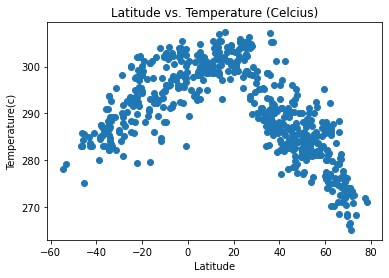

In [15]:
x=weather_data['lat']
y=weather_data['temp']
plt.scatter(x, y)
plt.title('Latitude vs. Temperature (Celcius)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(c)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

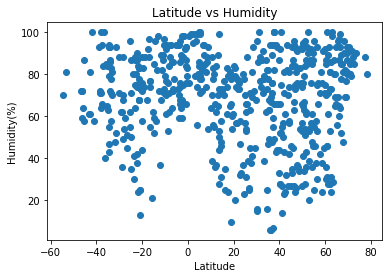

In [17]:

hum=weather_data['humidity']
plt.scatter(x, hum)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')


## Latitude vs. Cloudiness Plot

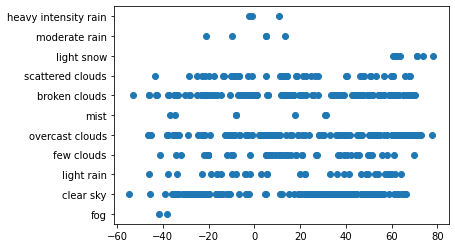

In [18]:
cloudiness=weather_data['cloudiness']
plt.scatter(x,cloudiness)

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression